In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import string

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
test.shape

(1953, 2)

In [4]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [5]:
train.drop('id', axis = 1, inplace = True)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 2 columns):
label    7920 non-null int64
tweet    7920 non-null object
dtypes: int64(1), object(1)
memory usage: 123.8+ KB


In [7]:
train['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [8]:
train['length'] = train['tweet'].apply(len)

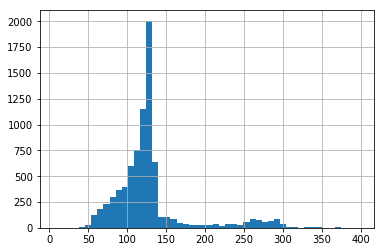

In [9]:
train['length'].hist(bins = 50)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F1D0EEF60>,
      dtype=object)

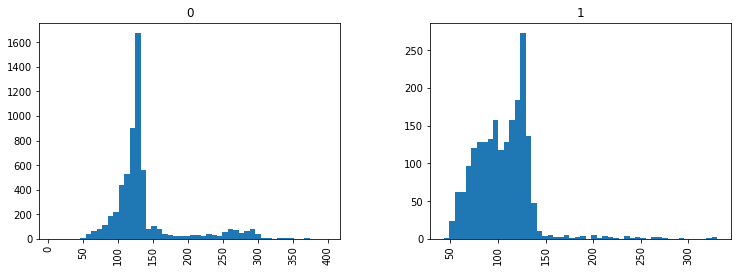

In [10]:
train.hist(column='length', by='label', bins=50,figsize=(12,4))

In [11]:
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [12]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

def clean_data(data):
    
    #set of punctuation
    punctuation = set(string.punctuation)
    
    data1 = pd.DataFrame()
    
    
    
    #remove @user kind of patterns
    data1['tweet'] = data['tweet'].apply(lambda x : remove_pattern(x, r"@[\w]*"))
    
    #remove https: links
    data1['tweet'] = data1['tweet'].apply(lambda x : ' '.join(word for word in x.split(' ') if not word.startswith('http')))
    
    #remove any special char other than a-z/A-Z/#
    data1['tweet'] = data1['tweet'].apply(lambda x : x.replace("[^a-zA-Z#]", " "))
    
    #remove any word whose length is less than 3
    data1['tweet'] = data1['tweet'].apply(lambda x : ' '.join([i for i in x.split(' ') if len(i)>2]))
    
    #remove any punctuation
    data1['tweet'] = data1['tweet'].apply(lambda x : ''.join([char for char in x if char not in punctuation]))
    
    #stemming
    ps =PorterStemmer()
    data1['tweet'] = data1['tweet'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))
    
    #stopword removal
    data1['tweet'] = data1['tweet'].apply(lambda x : ' '.join([word for word in x.split() if word.lower() not in stopwords.words('english')]))
    
    
    
    return data1['tweet']

In [13]:
train['clean_data'] = clean_data(train)
test['clean_data'] = clean_data(test)

In [14]:
#''.join([char for char in '#fingerprint #Pregnancy' if char not in set(string.punctuation) and char =='#'])
#'#fingerprint #Pregnancy'.replace("[^a-zA-Z#]", " ")

In [15]:
train.head()

,label,tweet,length,clean_data
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,128,fingerprint pregnanc test android app beauti c...
1,0,Finally a transparant silicon case ^^ Thanks t...,131,final transpar silicon case thank uncl yay son...
2,0,We love this! Would you go? #talk #makememorie...,123,love thi would go talk makememori unplug relax...
3,0,I'm wired I know I'm George I was made that wa...,112,Im wire know Im georg wa made way iphon cute d...
4,1,What amazing service! Apple won't even talk to...,124,amaz servic appl wont even talk question unles...


In [16]:
#train['tweet'] = train['tweet'].apply(lambda x : x.split())

In [17]:
#pip install wordcloud

In [18]:
all_words = ' '.join([sent for sent in train['clean_data']])

In [19]:
#all_words

In [20]:
from wordcloud import WordCloud

def print_wordcloud(words, title):
    wordcloud = WordCloud(height = 1000, width = 1400, random_state = 101, max_font_size = 110).generate(words)

    plt.figure(figsize = (16,10))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

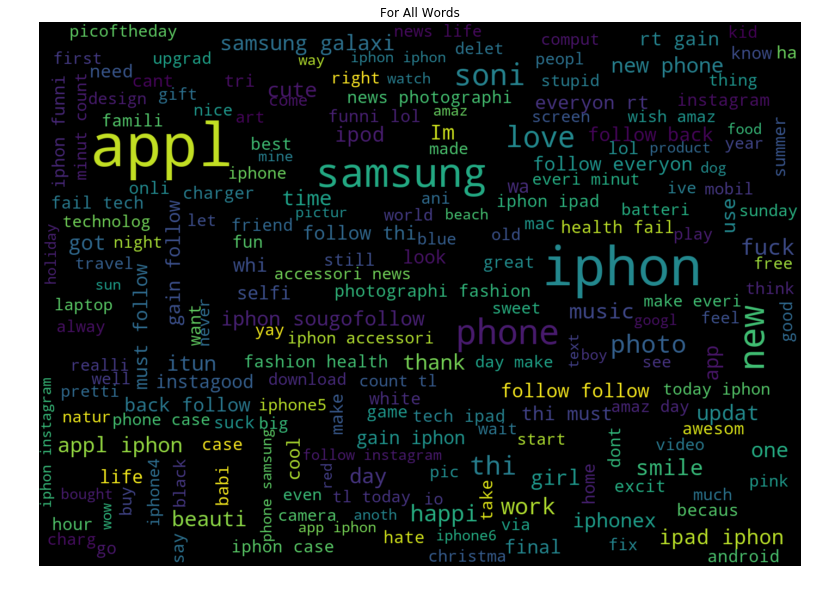

In [21]:
print_wordcloud(all_words, 'For All Words')

In [22]:
good_words = ' '.join([sent for sent in train[train['label'] == 0]['clean_data']])
bad_words = ' '.join([sent for sent in train[train['label'] == 1]['clean_data']])

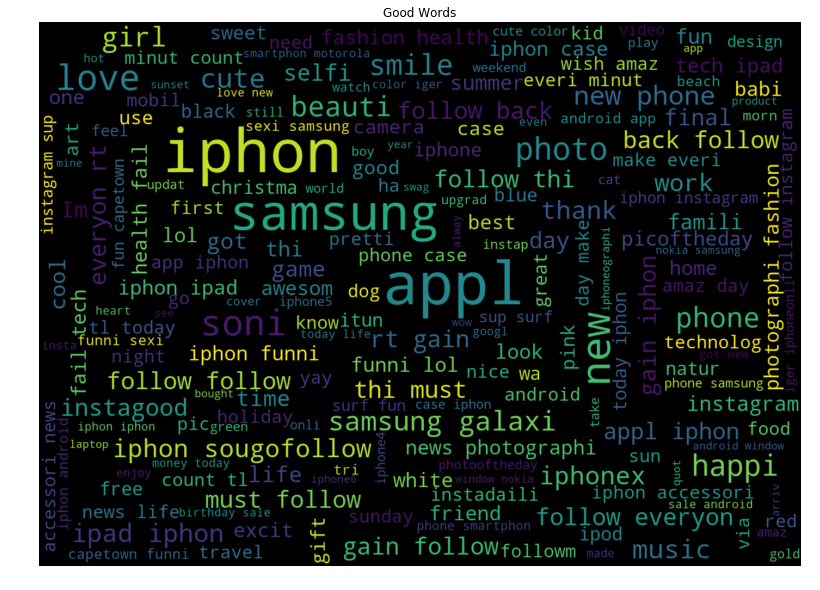

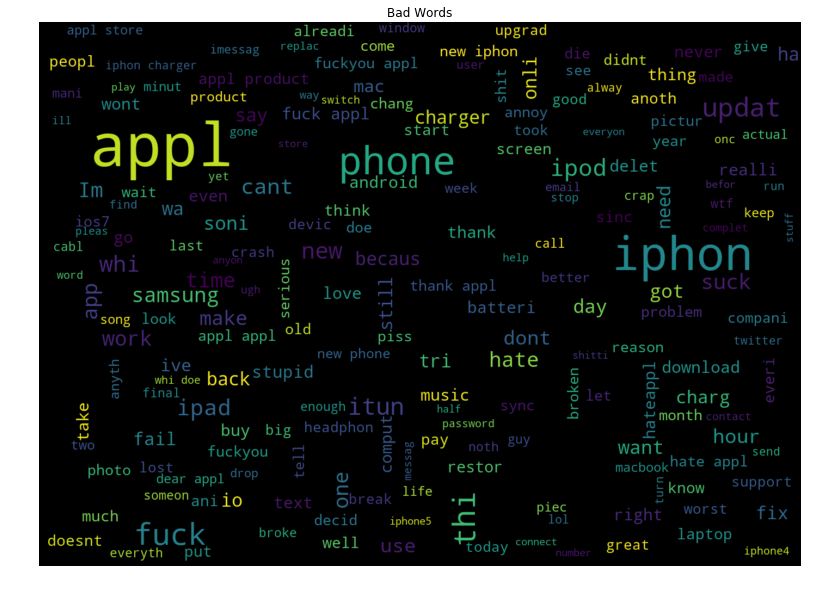

In [23]:
print_wordcloud(good_words, 'Good Words')
print_wordcloud(bad_words, 'Bad Words')

In [24]:
def extract_hastag(words):
    hashtags = []
    ht = re.findall(r"#(\w+)", words)
    hashtags.append(ht)
    return hashtags

In [25]:
good_hashtag = extract_hastag(' '.join([word.lower() for word in train[train['label'] == 0]['tweet']]))
bad_hashtag = extract_hastag(' '.join([word.lower() for word in train[train['label'] == 1]['tweet']]))

In [26]:
good_hashtag = sum(good_hashtag,[])
bad_hashtag = sum(bad_hashtag,[])

In [27]:
freq_good_hashtag = nltk.FreqDist(good_hashtag)
freq_bad_hashtag = nltk.FreqDist(bad_hashtag)

In [28]:
df_freq_good_hashtag = pd.DataFrame({'Hashtag': list(freq_good_hashtag.keys()), 'Count': list(freq_good_hashtag.values())})
df_freq_bad_hashtag = pd.DataFrame({'Hashtag': list(freq_bad_hashtag.keys()), 'Count': list(freq_bad_hashtag.values())})

In [29]:
top20_good_hashtag = df_freq_good_hashtag.sort_values(by = 'Count', ascending = False).head(20)
top20_bad_hashtag = df_freq_bad_hashtag.sort_values(by = 'Count', ascending = False).head(20)

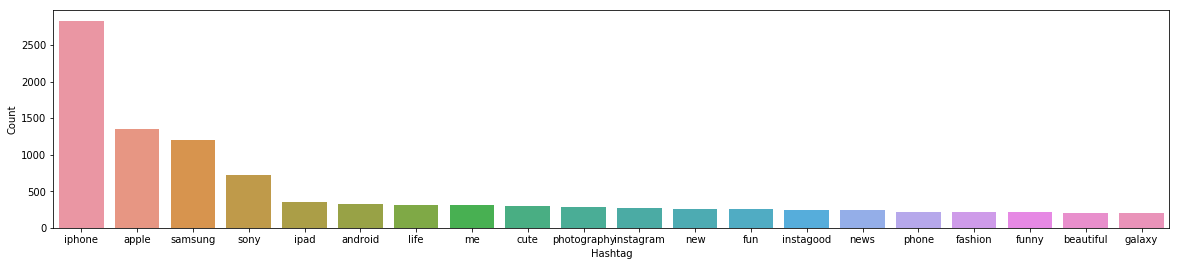

In [30]:
plt.figure(figsize = (20,4))
sns.barplot(x = 'Hashtag', y = 'Count', data = top20_good_hashtag)

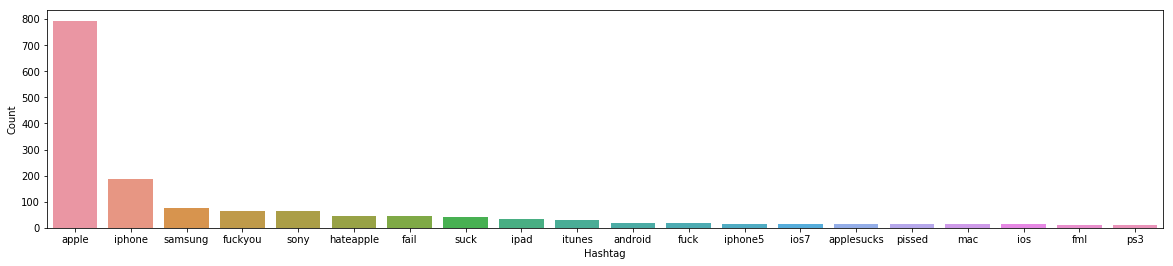

In [31]:
plt.figure(figsize = (20,4))
sns.barplot(x = 'Hashtag', y = 'Count', data = top20_bad_hashtag)

In [32]:
train.head()

,label,tweet,length,clean_data
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,128,fingerprint pregnanc test android app beauti c...
1,0,Finally a transparant silicon case ^^ Thanks t...,131,final transpar silicon case thank uncl yay son...
2,0,We love this! Would you go? #talk #makememorie...,123,love thi would go talk makememori unplug relax...
3,0,I'm wired I know I'm George I was made that wa...,112,Im wire know Im georg wa made way iphon cute d...
4,1,What amazing service! Apple won't even talk to...,124,amaz servic appl wont even talk question unles...


In [33]:
#remove https: links
#train['clean_data'] = train['clean_data'].apply(lambda x : ' '.join(word for word in x.split(' ') if not word.startswith('http')))
#test['clean_data'] = test['clean_data'].apply(lambda x : ' '.join(word for word in x.split(' ') if not word.startswith('http')))

In [34]:
test.head()

,id,tweet,clean_data
0,7921,I hate the new #iphone upgrade. Won't let me d...,hate new iphon upgrad wont let download app ug...
1,7922,currently shitting my fucking pants. #apple #i...,current shit fuck pant appl imac cashmoney rad...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t...",Id like put cdrom ipad possibl ye wouldnt bloc...
3,7924,My ipod is officially dead. I lost all my pict...,ipod offici dead lost pictur video 5so concert...
4,7925,Been fighting iTunes all night! I only want th...,fight itun night onli want music paid


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=500, stop_words='english', ngram_range=(1, 4)).fit(train['clean_data'])
# bag-of-words feature matrix
bow_train = bow_vectorizer.transform(train['clean_data']).todense()
bow_test = bow_vectorizer.transform(test['clean_data']).todense()

In [36]:
bow_train_df = pd.DataFrame(bow_train, columns = bow_vectorizer.get_feature_names())
bow_train_df['length'] = np.log(train.length)
bow_train_df.head()

,2017,2018,accessori,accessori news,accessori news life,alreadi,alway,amaz,amaz day,amaz day make,...,work,world,wow,xperia,yay,ye,yeah,year,youtub,length
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.852030
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,4.875197
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.812184
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.718499
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4.820282


In [37]:
test['length'] = test['tweet'].apply(len)

In [38]:
bow_test_df = pd.DataFrame(bow_test, columns = bow_vectorizer.get_feature_names())
bow_test_df['length'] = np.log(test.length)
bow_test_df.head()

,2017,2018,accessori,accessori news,accessori news life,alreadi,alway,amaz,amaz day,amaz day make,...,work,world,wow,xperia,yay,ye,yeah,year,youtub,length
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.343805
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.744932
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4.644391
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.859812
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.248495


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=500, stop_words='english', ngram_range=(1, 4)).fit(train['clean_data'])
# TF-IDF feature matrix
tfidf_train = bow_vectorizer.transform(train['clean_data']).todense()
tfidf_test = bow_vectorizer.transform(test['clean_data']).todense()

In [40]:
tfidf_train_df = pd.DataFrame(tfidf_train, columns = tfidf_vectorizer.get_feature_names())
tfidf_train_df['length'] = np.log(train.length)
tfidf_train_df.head()

,2017,2018,accessori,accessori news,accessori news life,alreadi,alway,amaz,amaz day,amaz day make,...,work,world,wow,xperia,yay,ye,yeah,year,youtub,length
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.852030
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,4.875197
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.812184
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.718499
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4.820282


In [41]:
tfidf_test_df = pd.DataFrame(tfidf_test, columns = tfidf_vectorizer.get_feature_names())
tfidf_test_df['length'] = np.log(test.length)
tfidf_test_df.head()

,2017,2018,accessori,accessori news,accessori news life,alreadi,alway,amaz,amaz day,amaz day make,...,work,world,wow,xperia,yay,ye,yeah,year,youtub,length
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.343805
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.744932
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4.644391
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.859812
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.248495


In [42]:
#train test split
from sklearn.model_selection import train_test_split
trainx_bow, testx_bow, trainy_bow, testy_bow = train_test_split(bow_train_df, train['label'], test_size = 0.4, random_state = 101)
trainx_tfidf, testx_tfidf, trainy_tfidf, testy_tfidf = train_test_split(tfidf_train_df, train['label'], test_size = 0.4, random_state = 101)

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [44]:
lr.fit(trainx_bow, trainy_bow)
pred_bow = lr.predict(testx_bow)

C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
def print_report(actual, pred):
    print(classification_report(actual, pred))
    print(confusion_matrix(actual, pred))
    print(f1_score(actual, pred))

In [46]:
print_report(testy_bow, pred_bow)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2346
           1       0.78      0.69      0.73       822

    accuracy                           0.87      3168
   macro avg       0.84      0.81      0.82      3168
weighted avg       0.87      0.87      0.87      3168

[[2188  158]
 [ 253  569]]
0.7346675274370561


In [49]:
lr.fit(trainx_tfidf,trainy_tfidf)
pred_tfidf = lr.predict(testx_tfidf)

C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
print_report(testy_tfidf, pred_tfidf)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2346
           1       0.78      0.69      0.73       822

    accuracy                           0.87      3168
   macro avg       0.84      0.81      0.82      3168
weighted avg       0.87      0.87      0.87      3168

[[2188  158]
 [ 253  569]]
0.7346675274370561


In [51]:
train.head()

,label,tweet,length,clean_data
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,128,fingerprint pregnanc test android app beauti c...
1,0,Finally a transparant silicon case ^^ Thanks t...,131,final transpar silicon case thank uncl yay son...
2,0,We love this! Would you go? #talk #makememorie...,123,love thi would go talk makememori unplug relax...
3,0,I'm wired I know I'm George I was made that wa...,112,Im wire know Im georg wa made way iphon cute d...
4,1,What amazing service! Apple won't even talk to...,124,amaz servic appl wont even talk question unles...


In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(trainx_bow, trainy_bow)
pred_bow = rf.predict(testx_bow)
print_report(testy_bow, pred_bow)

C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2346
           1       0.74      0.64      0.68       822

    accuracy                           0.85      3168
   macro avg       0.81      0.78      0.79      3168
weighted avg       0.84      0.85      0.84      3168

[[2162  184]
 [ 298  524]]
0.6849673202614379


In [53]:
rf = RandomForestClassifier()
rf.fit(trainx_tfidf, trainy_tfidf)
pred_tfidf = rf.predict(testx_tfidf)
print_report(testy_tfidf, pred_tfidf)

C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2346
           1       0.75      0.64      0.69       822

    accuracy                           0.85      3168
   macro avg       0.82      0.78      0.80      3168
weighted avg       0.85      0.85      0.85      3168

[[2174  172]
 [ 296  526]]
0.6921052631578948


In [54]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(trainx_bow, trainy_bow)
pred_bow = svc.predict(testx_bow)
print_report(testy_bow, pred_bow)

C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.77      0.99      0.87      2346
           1       0.89      0.14      0.25       822

    accuracy                           0.77      3168
   macro avg       0.83      0.57      0.56      3168
weighted avg       0.80      0.77      0.71      3168

[[2332   14]
 [ 704  118]]
0.2473794549266247


In [55]:
svc.fit(trainx_tfidf, trainy_tfidf)
pred_tfidf = svc.predict(testx_tfidf)
print_report(testy_tfidf, pred_tfidf)

C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.77      0.99      0.87      2346
           1       0.89      0.14      0.25       822

    accuracy                           0.77      3168
   macro avg       0.83      0.57      0.56      3168
weighted avg       0.80      0.77      0.71      3168

[[2332   14]
 [ 704  118]]
0.2473794549266247


In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(trainx_bow, trainy_bow)
pred_bow = knn.predict(testx_bow)
print_report(testy_bow, pred_bow)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2346
           1       0.75      0.47      0.58       822

    accuracy                           0.82      3168
   macro avg       0.79      0.71      0.73      3168
weighted avg       0.81      0.82      0.81      3168

[[2215  131]
 [ 437  385]]
0.5754857997010464


In [57]:
knn.fit(trainx_tfidf, trainy_tfidf)
pred_tfidf = knn.predict(testx_tfidf)
print_report(testy_tfidf, pred_tfidf)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2346
           1       0.75      0.47      0.58       822

    accuracy                           0.82      3168
   macro avg       0.79      0.71      0.73      3168
weighted avg       0.81      0.82      0.81      3168

[[2215  131]
 [ 437  385]]
0.5754857997010464


In [58]:
from xgboost import XGBClassifier
xg = XGBClassifier()

In [59]:
xg.fit(trainx_bow, trainy_bow)
pred_bow = xg.predict(testx_bow)
print_report(testy_bow, pred_bow)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2346
           1       0.78      0.57      0.66       822

    accuracy                           0.85      3168
   macro avg       0.82      0.76      0.78      3168
weighted avg       0.84      0.85      0.84      3168

[[2210  136]
 [ 352  470]]
0.6582633053221287


In [60]:
xg.fit(trainx_tfidf, trainy_tfidf)
pred_tfidf = xg.predict(testx_tfidf)
print_report(testy_tfidf, pred_tfidf)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2346
           1       0.78      0.57      0.66       822

    accuracy                           0.85      3168
   macro avg       0.82      0.76      0.78      3168
weighted avg       0.84      0.85      0.84      3168

[[2210  136]
 [ 352  470]]
0.6582633053221287


In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
parameters = {'C': np.linspace(1, 10, 10)}

In [63]:
gcv = GridSearchCV(lr, parameters, cv = 10, verbose = 5, n_jobs = 7)

In [64]:
gcv.fit(trainx_bow, trainy_bow)
pred_bow = gcv.predict(testx_bow)
print_report(testy_bow, pred_bow)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:   11.9s
[Parallel(n_jobs=7)]: Done  58 tasks      | elapsed:   14.1s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:   15.6s finished
C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2346
           1       0.78      0.69      0.73       822

    accuracy                           0.87      3168
   macro avg       0.84      0.81      0.82      3168
weighted avg       0.87      0.87      0.87      3168

[[2188  158]
 [ 253  569]]
0.7346675274370561


In [65]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(bow_train_df, train['label'])

Using TensorFlow backend.
C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

In [66]:
trainx_bow_res, testx_bow_res, trainy_bow_res, testy_bow_res = train_test_split(X_train_res, y_train_res, test_size = 0.4, random_state = 101)

In [67]:
lr = LogisticRegression()
lr.fit(trainx_bow_res, trainy_bow_res)
pred_bow = lr.predict(testx_bow_res)
print_report(testy_bow_res, pred_bow)

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      2375
           1       0.86      0.93      0.90      2341

    accuracy                           0.89      4716
   macro avg       0.90      0.89      0.89      4716
weighted avg       0.90      0.89      0.89      4716

[[2030  345]
 [ 157 2184]]
0.8969199178644764


C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
gcv_smote = GridSearchCV(lr, parameters, cv = 10, verbose = 5, n_jobs = 7)
gcv_smote.fit(trainx_bow_res, trainy_bow_res)
pred_bow = gcv_smote.predict(testx_bow_res)
print_report(testy_bow_res, pred_bow)

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=7)]: Done  58 tasks      | elapsed:    4.3s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    7.5s finished
C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.93      0.85      0.89      2375
           1       0.86      0.93      0.90      2341

    accuracy                           0.89      4716
   macro avg       0.90      0.89      0.89      4716
weighted avg       0.90      0.89      0.89      4716

[[2030  345]
 [ 157 2184]]
0.8969199178644764


In [69]:
#X_train_res, y_train_res = sm.fit_sample(bow_t, test['label'])

In [70]:
lr.fit(X_train_res, y_train_res)

C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
submission_lr = lr.predict(bow_test_df)

In [72]:
submission_lr_df = pd.DataFrame(columns = ['id', 'label'])

In [73]:
submission_lr_df['id'] = test['id']

In [74]:
submission_lr_df['label'] = submission_lr

In [75]:
submission_lr_df.head()

,id,label
0,7921,1
1,7922,1
2,7923,1
3,7924,1
4,7925,1


In [76]:
submission_lr_df.to_csv('submission_lr.csv', index = False)

# Neural Network

In [99]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Flatten
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [81]:
max_features = 25000
tokenizer = Tokenizer(nb_words = max_features, split = ' ')
tokenizer.fit_on_texts(train['clean_data'])
train_X = tokenizer.texts_to_sequences(train['clean_data'])
test_X = tokenizer.texts_to_sequences(test['clean_data'])
train_X_padded = pad_sequences(train_X, padding='post', maxlen=300)
test_X_padded = pad_sequences(test_X, padding='post', maxlen=300)

In [87]:
X_train_padded_smote, y_train_padded_somte = sm.fit_sample(train_X_padded, train['label'])

In [129]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_train_padded_smote,y_train_padded_somte, random_state = 42)

In [130]:
vocab_size = len(tokenizer.word_index) + 1
embedding_layer = Embedding(input_dim = vocab_size, output_dim = 100, input_length=300 , trainable=False)

In [149]:
model = Sequential()
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [150]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 300, 100)          1592100   
_________________________________________________________________
flatten_7 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 30001     
Total params: 1,622,101
Trainable params: 30,001
Non-trainable params: 1,592,100
_________________________________________________________________
None


In [151]:
history = model.fit(X1_train, Y1_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Train on 7072 samples, validate on 1769 samples
Epoch 1/6
7072/7072 [==============================] - 1s 184us/step - loss: 0.6886 - acc: 0.5397 - val_loss: 0.6813 - val_acc: 0.5551
Epoch 2/6
7072/7072 [==============================] - 1s 123us/step - loss: 0.6799 - acc: 0.5551 - val_loss: 0.6841 - val_acc: 0.5512
Epoch 3/6
7072/7072 [==============================] - 1s 129us/step - loss: 0.6718 - acc: 0.5717 - val_loss: 0.6777 - val_acc: 0.5540
Epoch 4/6
7072/7072 [==============================] - 1s 130us/step - loss: 0.6628 - acc: 0.5922 - val_loss: 0.6542 - val_acc: 0.6631
Epoch 5/6
7072/7072 [==============================] - 1s 125us/step - loss: 0.6484 - acc: 0.6479 - val_loss: 0.6552 - val_acc: 0.5636
Epoch 6/6
7072/7072 [==============================] - 1s 131us/step - loss: 0.6471 - acc: 0.6355 - val_loss: 0.6499 - val_acc: 0.5743


In [152]:
score = model.evaluate(X1_test, Y1_test, verbose=1)

2947/2947 [==============================] - 0s 105us/step


In [153]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6474003211740805
Test Accuracy: 0.5822870716083483


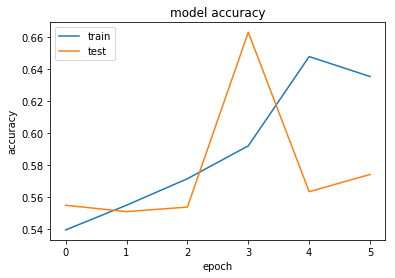

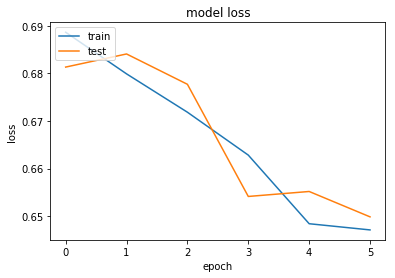

In [154]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# # # LSTM

In [194]:
model1 = Sequential()
model1.add(Embedding(input_dim = vocab_size, output_dim = 130, input_length = 300, dropout=0.2))
#model1.add(Flatten())
model1.add(LSTM(130, dropout_U=0.2,dropout_W=0.2))
#model.add(Flatten())
model1.add(Dense(2,activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model1.summary())

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 300, 130)          2069730   
_________________________________________________________________
lstm_29 (LSTM)               (None, 130)               135720    
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 262       
Total params: 2,205,712
Trainable params: 2,205,712
Non-trainable params: 0
_________________________________________________________________
None


In [196]:
history = model1.fit(X1_train, Y1_train, nb_epoch = 1, batch_size=128, verbose = 2)

Epoch 1/1
 - 54932s - loss: 0.6942 - acc: 0.4962
